In [48]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn import datasets

import matplotlib.pyplot as plt


batch_size = 5

(1700, 64)


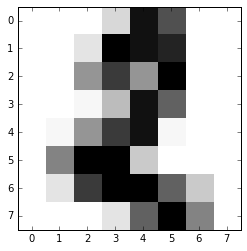

In [49]:
digits = datasets.load_digits()
plt.imshow(digits.images[batch_size//2], interpolation='nearest', cmap='Greys')
digits.images = digits.images.reshape((-1, 8*8))[:1700,...]  # round number
print(digits.images.shape)

0.0040990146808326244

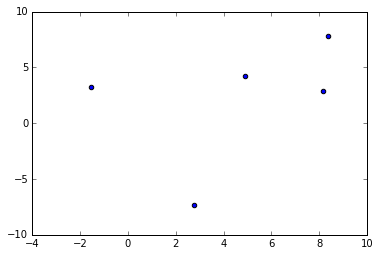

In [56]:
tf.reset_default_graph()
# get the data in
all_images = tf.Variable(digits.images, trainable=False, dtype=tf.float32)
image_producer = tf.train.slice_input_producer([all_images], 
                                               num_epochs=100,
                                               shuffle=True,
                                               capacity=3*batch_size)
image_batch = tf.train.batch(image_producer, batch_size)
sess = tf.Session()#build computational graph

W = tf.get_variable('weights',
                    shape=[8*8, 64],  # can it learn the identity?
                   initializer=tf.uniform_unit_scaling_initializer(1.0))
mid = tf.matmul(image_batch, W)
# mid = tf.nn.tanh(mid)
recon = tf.matmul(mid, tf.transpose(W))

#set up loss and optimiser
loss = tf.reduce_mean((image_batch - recon)**2)
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

sess.run(tf.initialize_all_variables())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

try:
    step = 0
    while not coord.should_stop():
        _, loss_val = sess.run([train_step, loss])
        if step % 100 == 1:
            print('\r{}'.format(loss_val), end='', flush=True)
        step += 1
except tf.errors.OutOfRangeError:
    print('Done {} steps'.format(step))
finally:
    coord.request_stop

dim_red = sess.run(mid,feed_dict = {image_batch: digits.images[:batch_size,...]})
plt.scatter(dim_red[:,0],dim_red[:,1])

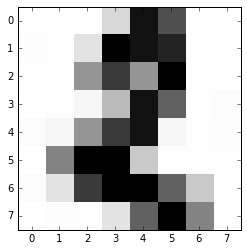

In [57]:
plt.imshow(sess.run(recon, feed_dict={image_batch: digits.images[:batch_size,...]})[batch_size//2].reshape((8,8)), 
           interpolation='nearest',
           cmap='Greys')

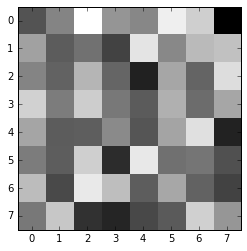

In [58]:
plt.imshow(sess.run(W)[:,0].reshape((8,8)), cmap='Greys', interpolation='nearest')